# Assignment 5 Code Notebook

This notebook serves as the primary source material for the questions in Assignment 5. All questions, however, are written questions that you will turn in on Gradescope.

While we have mentioned in this course that notebooks are not good tools for disseminating code, they _are_ good tools for interacting with code and understanding what is happening. As such, all the code (including function definitions) are provided in this notebook. If you ever need to return your code to its original state in order to answer the questions, please remember that you can always download a fresh copy of this notebook from Canvas. As such, you should feel free to manipulate and modify the provided code to aid your understanding.

Please note that the code provided here is heavily based on the PyTorch Foundation's introductory tutorials; please feel free to go through that material to gain further insight into the questions being asked.

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as fun
import numpy as np
import pylab
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 8)

## Question 1: Data

The dataset we will explore in this assignment is called Fashion MNIST - it is a commonly used introductory dataset with many similar qualities to MNIST, the digit recognition dataset mentioned in class (namely, there are 10 classes and all the images are $28 \times 28$ grayscale pixels).


The cell below downloads the train and test seets of the FashionMNIST dataset (if you have not already done so) into a folder called `data` at the path from which you are running this notebook.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)

# Download test data from open datsets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)



100%|██████████| 26.4M/26.4M [00:05<00:00, 4.79MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.99MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.71MB/s]


Now we can visualize the data (note the specific elements displayed are random).

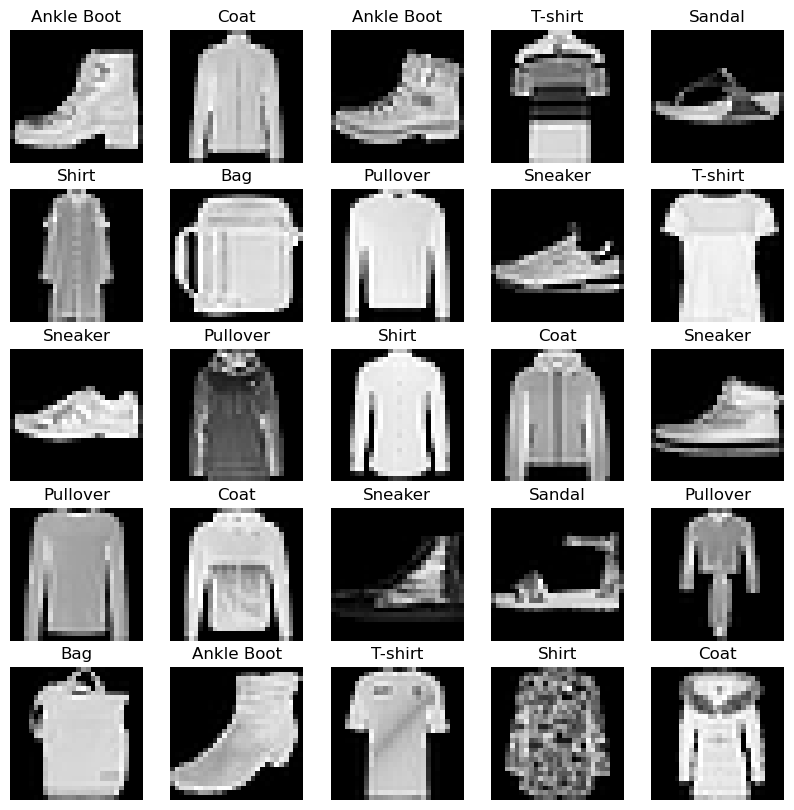

In [9]:
labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 5,5

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

### Question 1.1

Compare the objects found in the FashionMNIST dataset displayed by the above cell to the samples and categories found in the MNIST dataset (here is a previously generated random sampling):

<img src='/src/Assignment_5/MNIST_panel.png' width="500" height="500">

Do you expect FashionMNIST to be a harder or easier classification problem than MNIST? Why?

## Question 2: Dataloader



Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


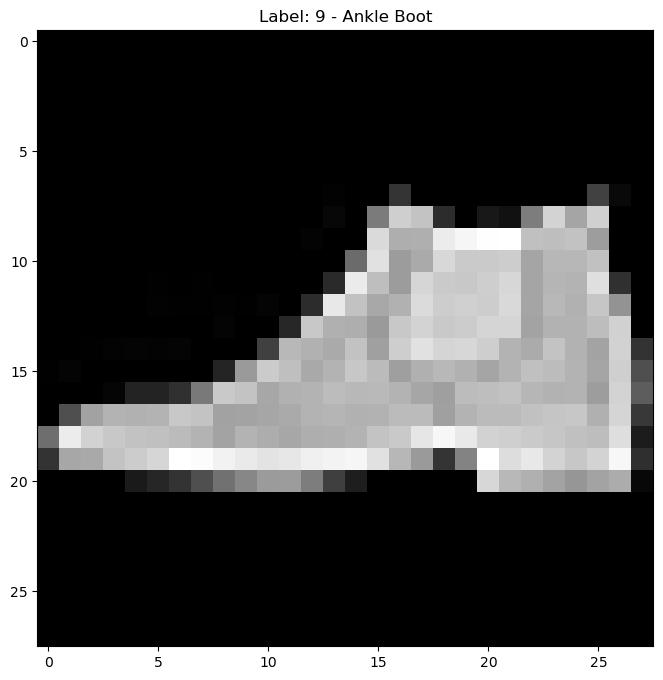

In [11]:
# Define hyperparameter
batch_size = 64

# Create data loaders
train_dl= DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size=batch_size)

X, y = next(iter(train_dl))
print(f'Shape of X [N, C, H, W]: {X.shape}')
print(f'Shape of y: {y.shape}')
image = X[0].squeeze()
label = y[0].item()
plt.title(f"Label: {label} - {labels_map[label]}")
plt.imshow(image, cmap="gray")
plt.show()

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
torch.Size([64, 28, 28])
Shape of y: torch.Size([64])


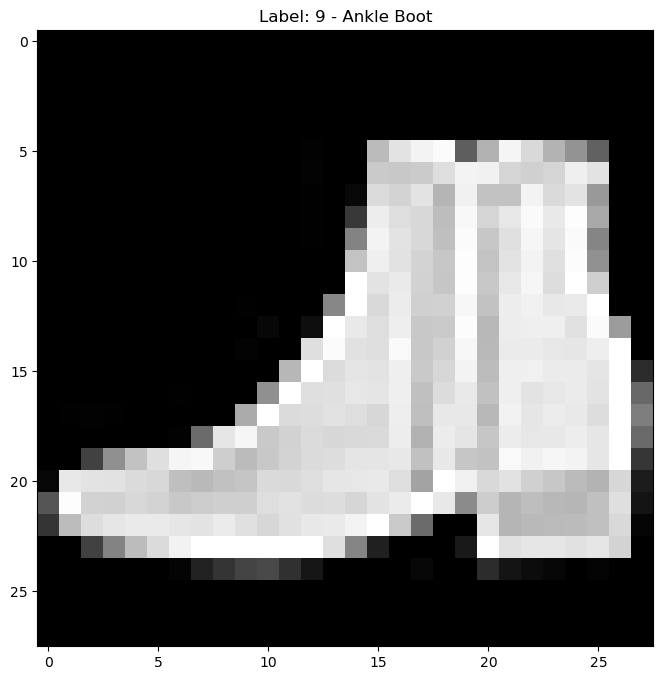

In [32]:
# Define hyperparameter
batch_size = 64

# Create data loaders
train_dl= DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size=batch_size)
X, y = next(iter(train_dl))
print(f'Shape of X [N, C, H, W]: {X.shape}')
print(X.squeeze().shape)
print(f'Shape of y: {y.shape}')
image = X[0].squeeze()
label = y[0].item()
plt.title(f"Label: {label} - {labels_map[label]}")
plt.imshow(image, cmap="gray")
plt.show()

### Question 2.1: X

In the code above we printed out the shape of `X` and `y`. What does `X` represent? In your explanation, be sure to explain what determines the shape of `X`.

### Question 2.2: Squeeze

When working with tensors we frequently have to use the `squeeze()` function when displaying them. What does the `squeeze()` function do?


## Question 3: Model

For this assignment we have created a rather simple toy network which is intentionally designed to be small enough to still tractibly train on a CPU machine.

In [33]:
# Get CPU/GPU device for training
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("GPU is available: " + str(torch.cuda.is_available()))
    
# Define the model
class simpleNN(torch.nn.Module):
    def __init__(self):
        super(simpleNN, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28*28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

GPU is available: False


In [34]:
model = simpleNN().to(device)

print(model)

simpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Question 3.1: Network Shape

In the cell above we print the network after constructing it and sending it to the PyTorch device. Look at this printout of the network structure and the code used to construct it. Is this network a Convolutional Neural Network, Fully-Connected Network, a combination of both convolution and fully-connected layers, or something else?

## Question 4: Training

In [35]:
lr = 0.001
epochs = 5

lossfunc = torch.nn.CrossEntropyLoss()

opt = torch.optim.SGD(model.parameters(), lr=lr)

In [36]:
def trainloop(dataloader, model, lossfunc, optimizer):
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (X,y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        
        prediction = model(X)
        loss = lossfunc(prediction, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')
            
def evaluate(dataloader, model, lossfunc):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader:
            X,y = X.to(device),y.to(device)
            pred = model(X)
            test_loss += lossfunc(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [37]:
for i in range(epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    trainloop(train_dl, model, lossfunc, opt)
    evaluate(test_dl, model, lossfunc)
print("Done!")

Epoch 1
-------------------------------
loss:2.310694 [    0/60000]
loss:2.255326 [ 6400/60000]
loss:2.200708 [12800/60000]
loss:2.165542 [19200/60000]
loss:2.087957 [25600/60000]
loss:2.066267 [32000/60000]
loss:1.964432 [38400/60000]
loss:1.891895 [44800/60000]
loss:1.834801 [51200/60000]
loss:1.729296 [57600/60000]
Test Error: 
 Accuracy: 58.2%, Avg loss: 1.709083 

Epoch 2
-------------------------------
loss:1.688421 [    0/60000]
loss:1.618330 [ 6400/60000]
loss:1.552523 [12800/60000]
loss:1.421855 [19200/60000]
loss:1.518325 [25600/60000]
loss:1.342358 [32000/60000]
loss:1.229776 [38400/60000]
loss:1.254637 [44800/60000]
loss:1.169268 [51200/60000]
loss:1.084193 [57600/60000]
Test Error: 
 Accuracy: 69.2%, Avg loss: 1.143432 

Epoch 3
-------------------------------
loss:1.187443 [    0/60000]
loss:1.109811 [ 6400/60000]
loss:1.019032 [12800/60000]
loss:1.164151 [19200/60000]
loss:1.011682 [25600/60000]
loss:1.044389 [32000/60000]
loss:0.893327 [38400/60000]
loss:0.924590 [44800

Note the below two questions are _not_ asking you to predict the effectiveness of training, but rather whether or not your code could run.

### Question 4.1: MNIST

As mentioned in class, MNIST is another extremely popular introductory training dataset, and inspired much of the design of the FashionMNIST dataset used here. MNIST consists of 70,000 $28 \times 28$ pixel gray-scale images drawn from 10 classes (the digits 0-9).

Could a network set up to train on Fashion MNIST be alternatively trained on MNIST without any modifications to the network architecture (i.e. could you swap out `train_dl` with a dataloader for MNIST)? Why or why not?

### Question 4.2: CIFAR10

Another popular introductory dataset is CIFAR10, a collection of 60,000 $32 \times 32$ pixel RGB images divided into 10 object classes (airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).

Could a network set up to train on Fashion MNIST be alternatively trained on CIFAR10 without any modifications to the network architecture (i.e. could you swap out `train_dl` with a dataloader for CIFAR10)? Why or why not?


### Question 4.3: Evaluate

Above we defined a `trainloop` and an `evaluate` function, each of which require the same three arguments. `trainloop`, however, additionally requires a fourth `optimizer` argument. Why does our `trainloop` code require an `optimizer` argument, while our `evaluate` function does not?

The cell below provides an example evaluation visualization snippet that will display a test image with a given index (`idx`) as well as print the predicted and ground truth ("actual") label for this image.

Predicted: "Sandal", Actual: "Sandal"


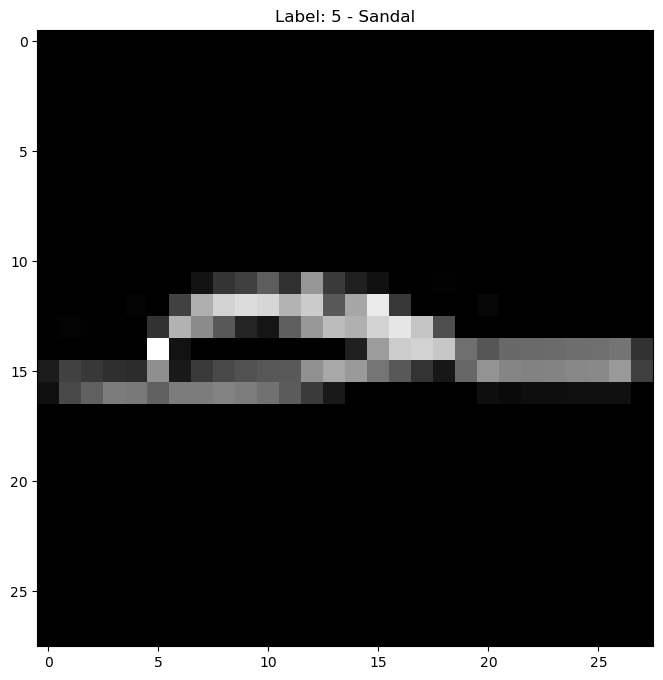

In [38]:
model.eval()
idx = 8
x, y = test_data[idx][0], test_data[idx][1]
with torch.no_grad():
    pred = model(x)
    pred_y= (pred[0].argmax(0)).item()
    predicted, actual = labels_map[pred_y], labels_map[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    image = x.cpu().squeeze()
    plt.title(f"Label: {y} - {labels_map[y]}")
    plt.imshow(image, cmap="gray")
    plt.show()

In [39]:
image

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000